In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
name='tips'
data=sns.load_dataset(name)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.shape

(244, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
data.select_dtypes(include='category')

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [8]:
for col in data.select_dtypes(include='category').columns:
    print(col,"=",data[col].unique())
    print()

sex = ['Female', 'Male']
Categories (2, object): ['Male', 'Female']

smoker = ['No', 'Yes']
Categories (2, object): ['Yes', 'No']

day = ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

time = ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']



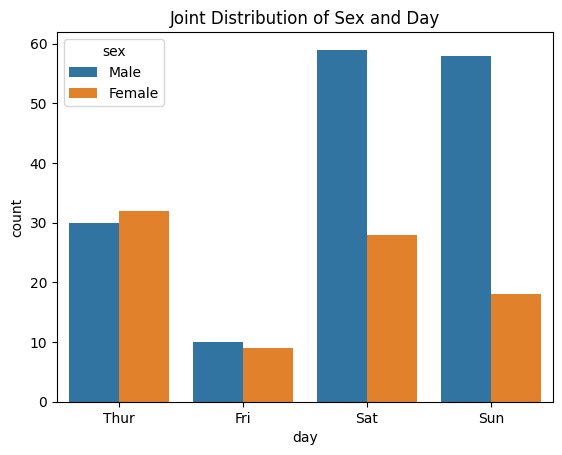

In [9]:
sns.countplot(x='day',hue='sex', data=data)
plt.title("Joint Distribution of Sex and Day")
plt.show()

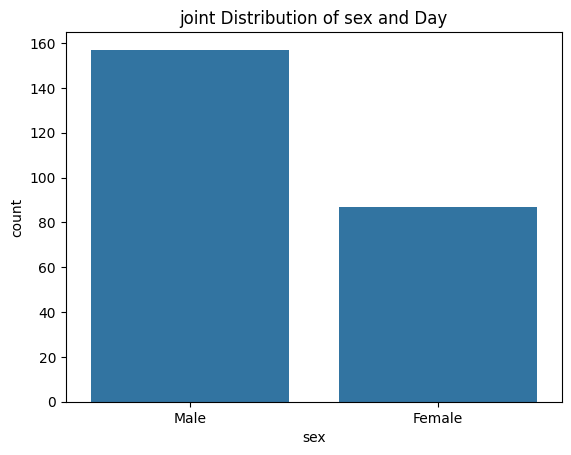

In [10]:
sns.countplot(x='sex', data=data)
plt.title('joint Distribution of sex and Day')
plt.show()

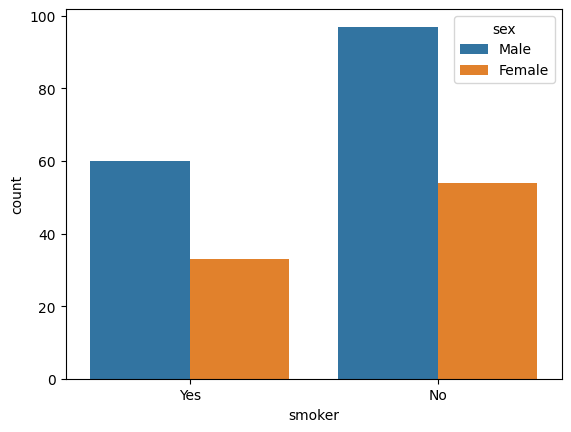

In [11]:
sns.countplot(x=data.smoker, data=data, hue='sex')
plt.show()


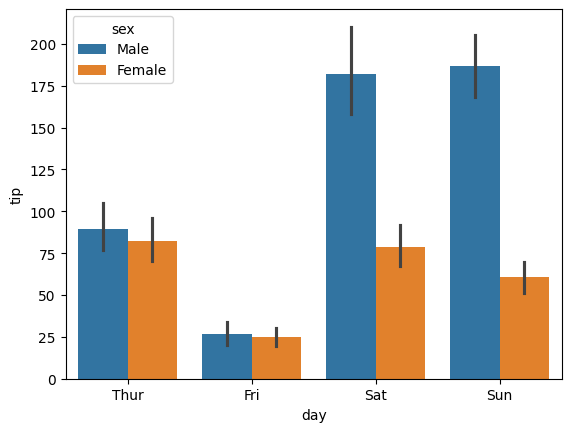

In [12]:
sns.barplot(x='day', y='tip', hue='sex', data=data, estimator=sum)
plt.show()

In [13]:
data.groupby('day')['tip'].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23664\2830072015.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['tip'].sum()


day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

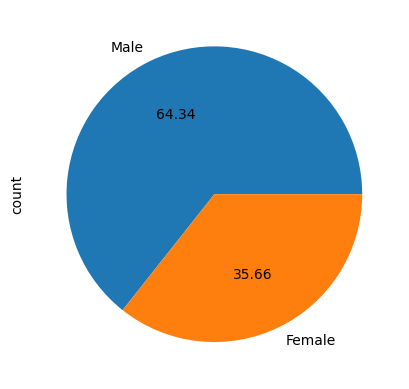

In [14]:
data['sex'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [15]:
# sns.barplot(x='sex', y='total_bill', database)

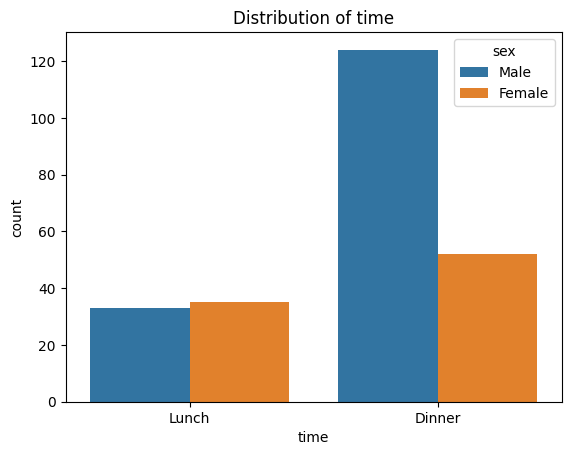

In [16]:
sns.countplot(x='time', hue='sex', data=data)
plt.title("Distribution of time")
plt.show()

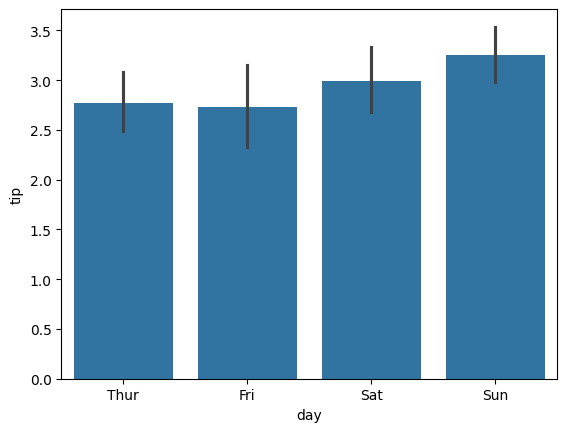

In [17]:
sns.barplot(x='day',y='tip', data=data)
plt.show()

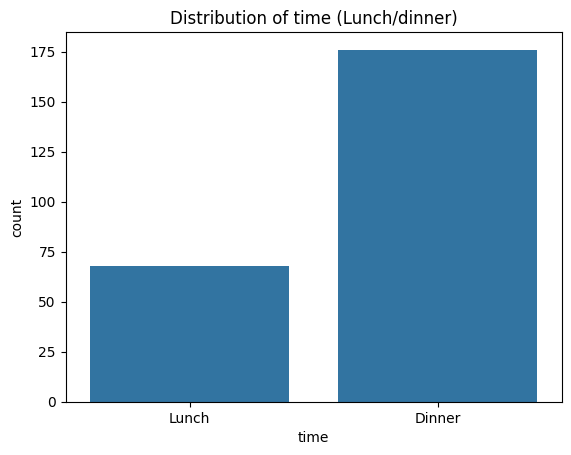

In [18]:
sns.countplot(x='time',data=data)
plt.title("Distribution of time (Lunch/dinner)")
plt.show()

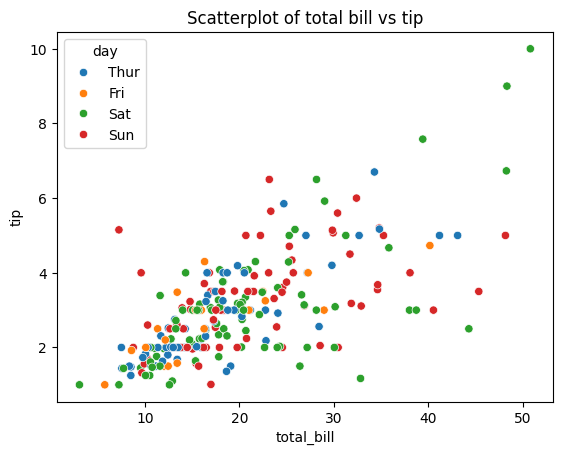

In [19]:
sns.scatterplot(x='total_bill',y='tip', data=data,hue="day")
plt.title("Scatterplot of total bill vs tip")
plt.show()

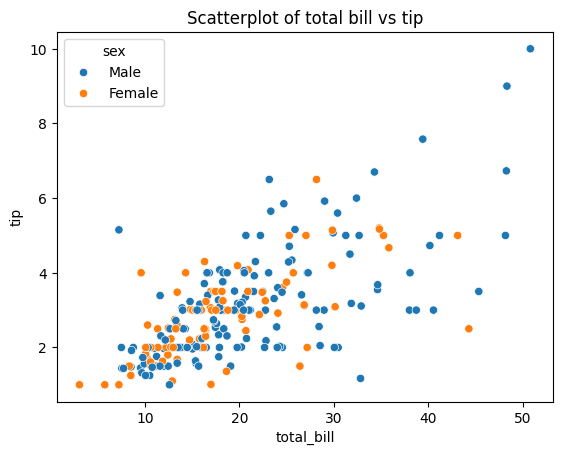

In [20]:
sns.scatterplot(x='total_bill', y='tip', data=data, hue="sex")
plt.title('Scatterplot of total bill vs tip')
plt.show()

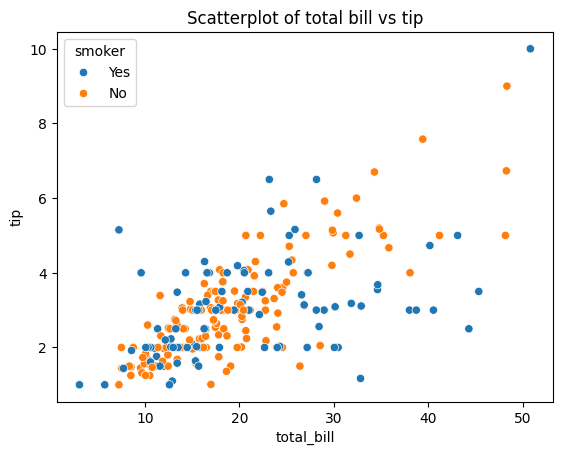

In [21]:
sns.scatterplot(x='total_bill', y='tip', data=data, hue="smoker")
plt.title('Scatterplot of total bill vs tip')
plt.show()

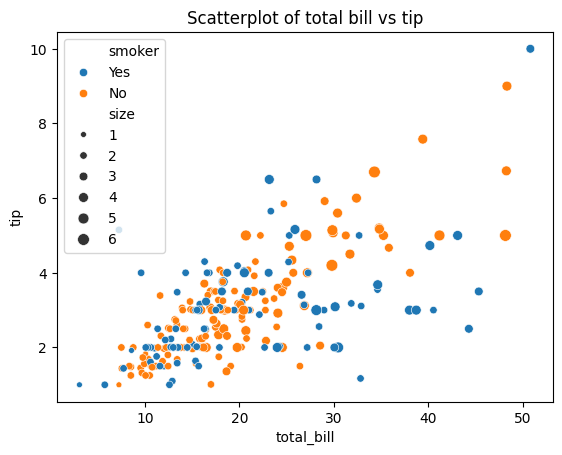

In [22]:
sns.scatterplot(x='total_bill', y='tip', data=data, hue="smoker", size="size")
plt.title("Scatterplot of total bill vs tip")
plt.show()


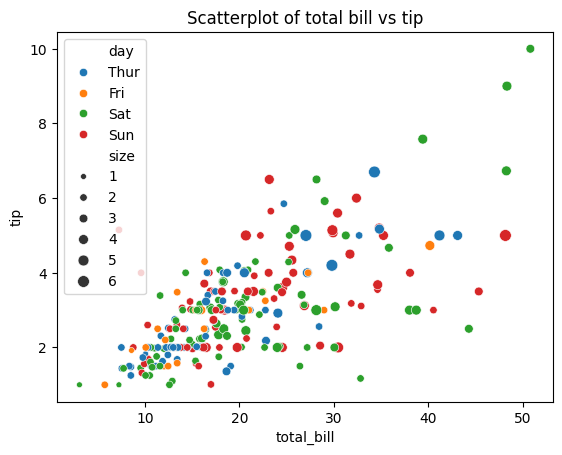

In [23]:
sns.scatterplot(x='total_bill', y='tip', data=data, hue="day", size="size")
plt.title("Scatterplot of total bill vs tip")
plt.show()


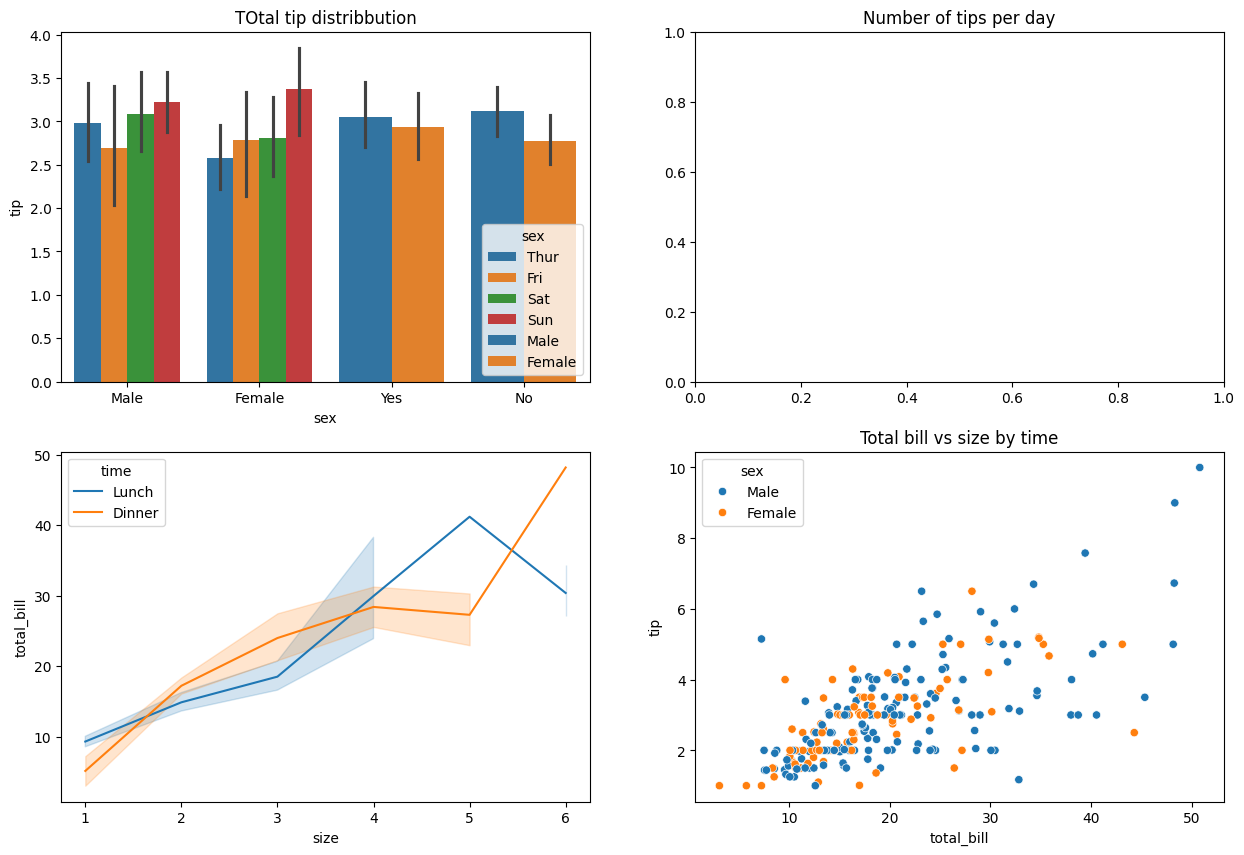

In [24]:
fig, axes=plt.subplots(2,2, figsize=(15, 10))
sns.barplot(x='sex', y='tip', data=data, hue='day',ax=axes[0,0])
axes[0,0].set_title("TOtal tip distribbution")

sns.barplot(x='smoker', y='tip', data=data, hue='sex',ax=axes[0,0])
axes[0,1].set_title("Number of tips per day")

sns.scatterplot(x="total_bill", y='tip', data=data, hue="sex", ax=axes[1,1])
axes[1,1].set_title('Tip vs. Total Bill')

sns.lineplot(x='size', y='total_bill', data=data, hue='time',ax=axes[1,0])
axes[1,1].set_title("Total bill vs size by time")

plt.show()

<Axes: >

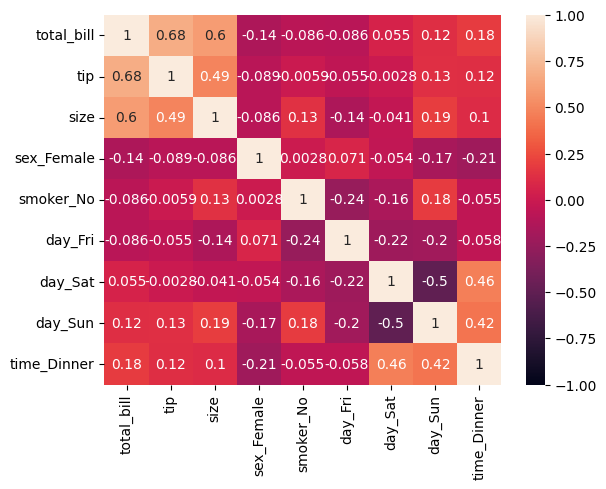

In [25]:
sns.heatmap(pd.get_dummies(data, dtype=int, drop_first=True).corr(), annot=True, vmin=-1)

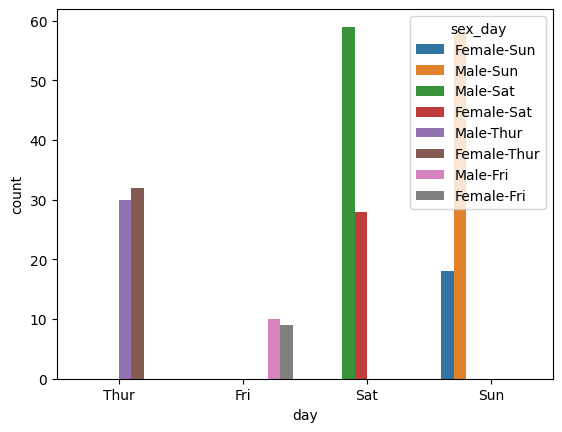

In [26]:
data['sex_day']=data['sex'].astype(str)+"-"+data['day'].astype(str)
sns.countplot(x='day', hue='sex_day',data=data)
plt.show()

In [27]:
data.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [28]:
data[data.day=="Thur"]

,total_bill,tip,sex,smoker,day,time,size,sex_day
77,27.20,4.00,Male,No,Thur,Lunch,4,Male-Thur
78,22.76,3.00,Male,No,Thur,Lunch,2,Male-Thur
79,17.29,2.71,Male,No,Thur,Lunch,2,Male-Thur
80,19.44,3.00,Male,Yes,Thur,Lunch,2,Male-Thur
81,16.66,3.40,Male,No,Thur,Lunch,2,Male-Thur
...,...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2,Female-Thur
203,16.40,2.50,Female,Yes,Thur,Lunch,2,Female-Thur
204,20.53,4.00,Male,Yes,Thur,Lunch,4,Male-Thur
205,16.47,3.23,Female,Yes,Thur,Lunch,3,Female-Thur


Text(0.5, 1.0, 'Distribution of Days')

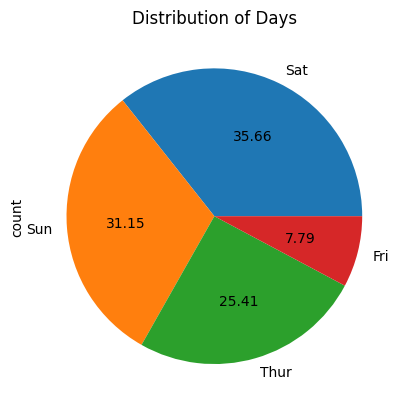

In [29]:
data.day.value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Distribution of Days")